In [4]:
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import tensorflow_hub as hub
import json
import matplotlib.image as mpimg
from skimage.transform import resize

from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

2024-02-13 14:58:00.589608: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Convert video into frames

In [5]:
# convert video into frames

!video-toimg output_1.avi

{'duration': None, 'in_files': ['output_1.avi'], 'per': 1, 'start': 0}
100%|██████████████████████████████████████████| 60/60 [00:00<00:00, 170.00it/s]


In [6]:
DIRNAME = "output_1"
# IMG_SIZE = [448, 448]
IMG_SIZE = [896, 896]

# Image Loader

In [7]:
# Load all images into a list

test_images = []
test_images_size_tups = []

for file in os.listdir(DIRNAME):
    img = cv2.imread(f"{DIRNAME}/{file}")
    test_images_size_tups.append(img.shape)

    img = cv2.resize(img, IMG_SIZE)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    test_images.append(img)

# Image Annotation with detection

In [8]:
# Annotate the images with detected boxes

# Choose threshold carefully: larger the threshold => more coarse/ fewer boxes

def get_annotated_img_objects(img, boxes, scores, num_detections, score_threshold=0.2):
    image = np.array(img)
    objects = 0
    box_list = []

    for i in range(num_detections):
        if scores[i] >= score_threshold:
            box = boxes[i]
            y_min, x_min, y_max, x_max = box
            
            cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)

            # print coordinates of the boxes
            # print((int(x_min),int(y_min)),(int(x_max), int(y_max)))

            box_list.append((int(x_min), int(y_min), int(x_max), int(y_max)))
            objects += 1

    return image, objects, box_list

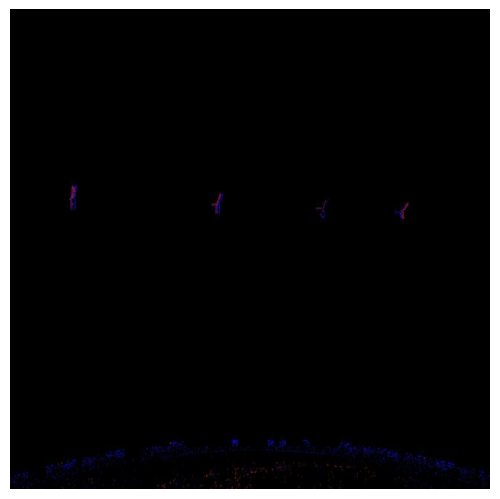

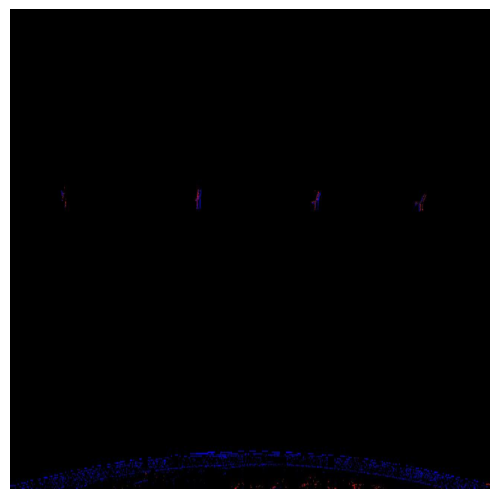

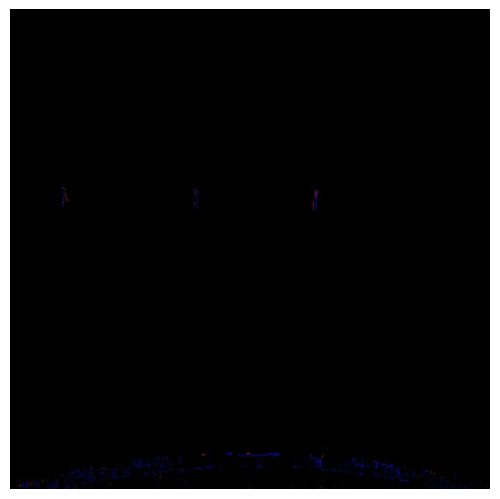

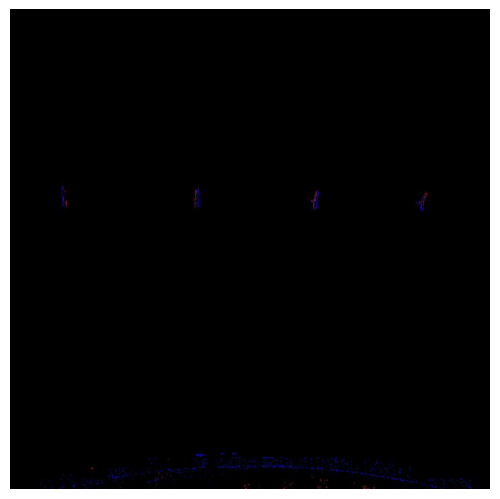

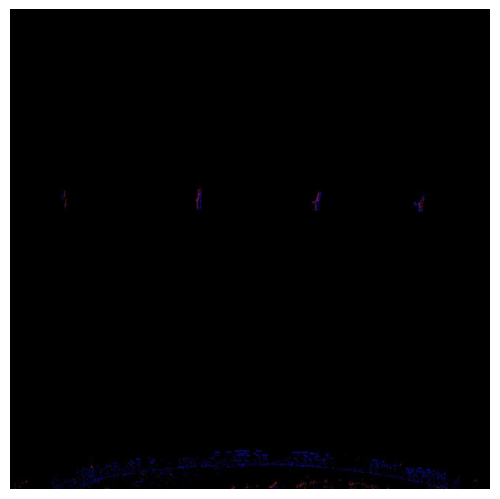

In [9]:
# Test image

test_images_size_tups[:5], test_images[0].shape, test_images[0].max()

for img in test_images[:5]:
    plt.imshow(img)
    plt.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.show()

# Using effcientdet lite2-detector

In [10]:
effdet2_model = hub.KerasLayer("https://kaggle.com/models/tensorflow/efficientdet/frameworks/tensorflow2/variations/lite2-detection/versions/1")

Image index: 30
No. of objects: 4
Detection Coordinates:
[(393, 347, 423, 392), (128, 324, 155, 385), (686, 367, 718, 405), (565, 362, 591, 400)]


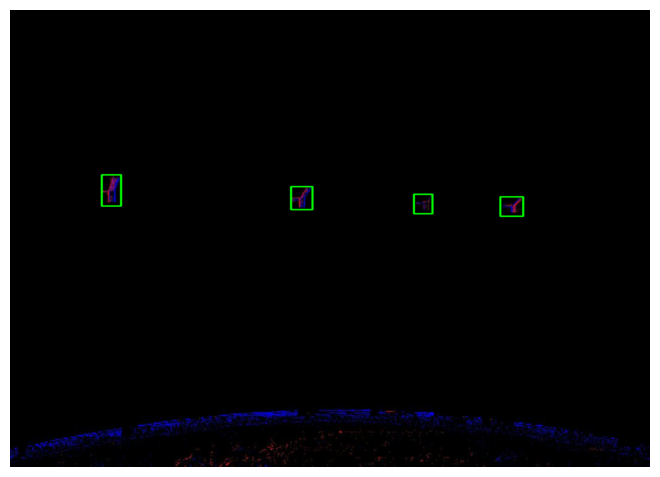

In [23]:
# Test image

# index = random.randint(0, len(test_images) - 1)
index = 30
print("Image index:", index)

sample_image_t = tf.constant(test_images[index], dtype=tf.uint8)
sample_image_t = tf.expand_dims(sample_image_t, axis=0)
image_np = sample_image_t.numpy()

boxes, scores, classes, num_detections = effdet2_model(image_np)

image_np = image_np[0]

# print("Image shape:", image_np.shape)
# print("Model Result Shapes:", boxes.shape, scores.shape, classes.shape, num_detections)
# print ("Detection Coordinates:")

img, objects, box_list = get_annotated_img_objects(image_np, boxes[0], scores[0], num_detections[0])
print("No. of objects:", objects)
print ("Detection Coordinates:")
print (box_list)

# print (box_list)

# # Specify the output file path
# output_file_path = "coordinates.txt"

# # Write the list to the text file
# with open(output_file_path, "w") as output_file:
#     output_file.write(f"Image Index {index}:\n")
#     for values in box_list:
#         output_file.write(f"{values}\n")
#     output_file.write(f"No. of objects: {objects}\n")


# Reshape the image to the desired dimensions
# Specify the new dimensions
new_width = 1400
new_height = 1000
img = resize(img, (new_height, new_width))


# print("No. of objects:", objects)
plt.imshow(img)
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.show()

# # Create a directory to save the plots if it doesn't exist
# output_folder = "results/"
# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)

# plt.savefig(output_folder + str(index) + '_effdet2_result.png')


# Using effcientdet lite3-detector¶

In [21]:
effdet3_model = hub.KerasLayer("https://kaggle.com/models/tensorflow/efficientdet/frameworks/tensorflow2/variations/lite3-detection/versions/1")

Image index: 30
No. of objects: 2
Detection Coordinates:
[(397, 344, 422, 392), (132, 325, 154, 380)]


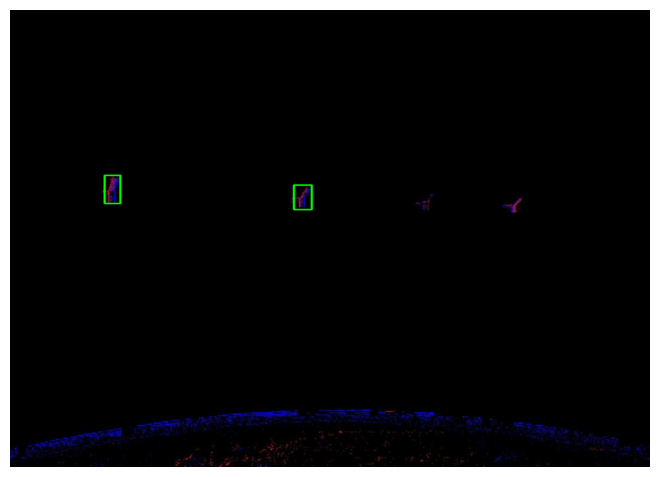

<Figure size 640x480 with 0 Axes>

In [22]:
# Test image

# index = random.randint(0, len(test_images) - 1)
index = 30
print("Image index:", index)

sample_image_t = tf.constant(test_images[index], dtype=tf.uint8)
sample_image_t = tf.expand_dims(sample_image_t, axis=0)
image_np = sample_image_t.numpy()

boxes, scores, classes, num_detections = effdet3_model(image_np)

image_np = image_np[0]

# print("Image shape:", image_np.shape)
# print("Model Result Shapes:", boxes.shape, scores.shape, classes.shape, num_detections)
# print ("Detection Coordinates:")

img, objects, box_list = get_annotated_img_objects(image_np, boxes[0], scores[0], num_detections[0])
print("No. of objects:", objects)
print ("Detection Coordinates:")
print (box_list)

# print (box_list)

# # Specify the output file path
# output_file_path = "coordinates.txt"

# # Write the list to the text file
# with open(output_file_path, "w") as output_file:
#     output_file.write(f"Image Index {index}:\n")
#     for values in box_list:
#         output_file.write(f"{values}\n")
#     output_file.write(f"No. of objects: {objects}\n")


# Reshape the image to the desired dimensions
# Specify the new dimensions
new_width = 1400
new_height = 1000
img = resize(img, (new_height, new_width))


# print("No. of objects:", objects)
plt.imshow(img)
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.show()

# # Create a directory to save the plots if it doesn't exist
# output_folder = "results/"
# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)

# plt.savefig(output_folder + str(index) + '_effdet3_result.png')

Image index: 0
No. of objects: 4
Detection Coordinates:
[(378, 343, 400, 389), (106, 324, 129, 382), (569, 348, 597, 396), (718, 358, 745, 397)]
Image index: 1
No. of objects: 3
Detection Coordinates:
[(561, 337, 583, 380), (754, 342, 778, 381), (342, 333, 358, 377)]
Image index: 2
No. of objects: 3
Detection Coordinates:
[(561, 331, 581, 379), (339, 331, 354, 377), (90, 328, 112, 374)]
Image index: 3
No. of objects: 4
Detection Coordinates:
[(757, 341, 779, 381), (559, 334, 582, 379), (90, 327, 109, 375), (342, 332, 358, 376)]
Image index: 4
No. of objects: 3
Detection Coordinates:
[(562, 338, 584, 380), (753, 344, 774, 382), (344, 331, 364, 379)]
Image index: 5
No. of objects: 4
Detection Coordinates:
[(379, 342, 403, 389), (108, 323, 132, 382), (716, 358, 763, 397), (569, 348, 599, 399)]
Image index: 6
No. of objects: 4
Detection Coordinates:
[(561, 337, 583, 380), (756, 343, 777, 381), (341, 332, 357, 377), (90, 325, 111, 374)]
Image index: 7
No. of objects: 3
Detection Coordinates

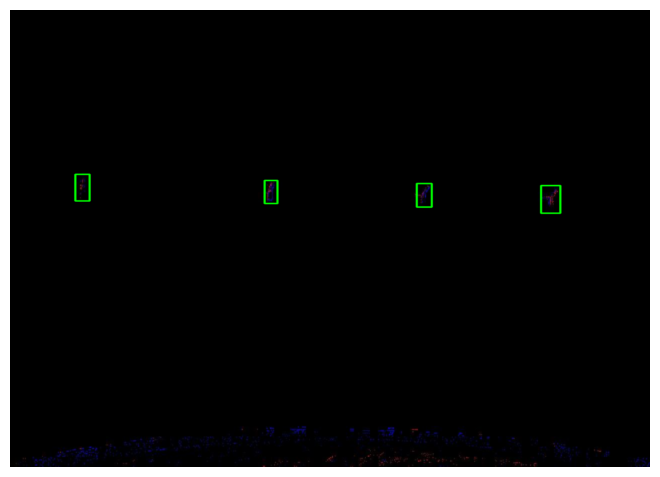

In [12]:

# Specify the output file path
output_file_path = "detection_coordinates.txt"

for index in range(len(test_images) - 1):

    # index = random.randint(0, len(test_images) - 1)
    # index = 98
    print("Image index:", index)

    sample_image_t = tf.constant(test_images[index], dtype=tf.uint8)
    sample_image_t = tf.expand_dims(sample_image_t, axis=0)
    image_np = sample_image_t.numpy()

    boxes, scores, classes, num_detections = effdet2_model(image_np)

    image_np = image_np[0]

    # print("Image shape:", image_np.shape)
    # print("Model Result Shapes:", boxes.shape, scores.shape, classes.shape, num_detections)
    # print()

    img, objects, box_list = get_annotated_img_objects(image_np, boxes[0], scores[0], num_detections[0])
    print("No. of objects:", objects)
    print ("Detection Coordinates:")
    print (box_list)

    # Write the list to the text file
    with open(output_file_path, "a") as output_file:
        output_file.write(f"Image Index: {index}\n")
        output_file.write(f"No. of objects: {objects}\n")
        output_file.write(f"Detection Coordinates: {box_list}\n")


    # Reshape the image to the desired dimensions
    # Specify the new dimensions
    new_width = 1400
    new_height = 1000
    img = resize(img, (new_height, new_width))
    
    plt.imshow(img)
    plt.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    # plt.show()
    

    # Create a directory to save the plots if it doesn't exist
    output_folder = "results/"
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    plt.savefig(output_folder + str(index) + '_effdet2_result.png')


# Create video from image detection results

In [13]:
# Create Video from results

!video-fromimg --input-files "results/*.png" --fps 10 Eventcamera_detection.mp4

{'fps': 10,
 'input_files': 'results/*.png',
 'nframes': None,
 'out_file': 'Eventcamera_detection.mp4'}
Eventcamera_detection.mp4: 100%|████████████████| 59/59 [00:01<00:00, 40.90it/s]


In [15]:
# index = random.randint(0, len(test_images) - 1)
# # index = 98
# print("Image index:", index)

# sample_image_t = tf.constant(test_images[index], dtype=tf.uint8)
# sample_image_t = tf.expand_dims(sample_image_t, axis=0)
# image_np = sample_image_t.numpy()

# boxes, scores, classes, num_detections = effdet3_model(image_np)

# image_np = image_np[0]

# print("Image shape:", image_np.shape)
# print("Model Result Shapes:", boxes.shape, scores.shape, classes.shape, num_detections)
# print()

# img, objects = get_annotated_img_objects(image_np, boxes[0], scores[0], num_detections[0])

# print("No. of objects:", objects)
# plt.imshow(img)

# plt.savefig("effdet3_results/" + str(index) + '_effdet3_result.png')

In [16]:
# for index in range(len(test_images) - 1):

#     # index = random.randint(0, len(test_images) - 1)
#     # index = 98
#     print("Image index:", index)

#     sample_image_t = tf.constant(test_images[index], dtype=tf.uint8)
#     sample_image_t = tf.expand_dims(sample_image_t, axis=0)
#     image_np = sample_image_t.numpy()

#     boxes, scores, classes, num_detections = effdet3_model(image_np)

#     image_np = image_np[0]

#     print("Image shape:", image_np.shape)
#     print("Model Result Shapes:", boxes.shape, scores.shape, classes.shape, num_detections)
#     print()

#     img, objects = get_annotated_img_objects(image_np, boxes[0], scores[0], num_detections[0])

#     print("No. of objects:", objects)
#     plt.imshow(img)
#     plt.savefig("effdet3_results/" + str(index) + '_effdet3_result.png')

# Using faster-rcnn-inception-resnet-v2

RESNET_IMG_SIZE = [640, 640]

In [17]:
# RESNET_IMG_SIZE = [640, 640]

In [18]:
# resnet_model = hub.KerasLayer("https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1")

In [19]:
# resnet_test_images = []

# for file in os.listdir(DIRNAME):
#     img = cv2.imread(f"{DIRNAME}/{file}")
#     img = cv2.resize(img, RESNET_IMG_SIZE)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = tf.constant(img, dtype=tf.uint8)

#     resnet_test_images.append(img)

In [20]:
# index = random.randint(0, len(resnet_test_images) - 1)
# # index = 98
# print("Image index:", index)

# sample_image_t = tf.constant(resnet_test_images[index], dtype=tf.uint8)
# sample_image_t = tf.expand_dims(sample_image_t, axis=0)
# image_np = sample_image_t.numpy()

# resnet_output_dict = resnet_model(image_np)

# image_np = image_np[0]

# resnet_boxes = resnet_output_dict.get("detection_boxes")[0] * RESNET_IMG_SIZE[0]
# resnet_scores = resnet_output_dict.get("detection_scores")[0]
# resnet_num_detections = int(resnet_output_dict.get("num_detections")[0])

# print("Image shape:", image_np.shape)
# print("Model Result Shapes:", resnet_boxes.shape, resnet_scores.shape, resnet_num_detections)
# print()

# img, objects = get_annotated_img_objects(image_np, resnet_boxes, resnet_scores, resnet_num_detections, 0.1)

# print("No. of objects:", objects)
# plt.imshow(img)